<a href="https://colab.research.google.com/github/DishantB0411/RTSM_2025/blob/main/AMEX_Stock_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df=pd.read_csv('/content/AMEX_stock_data.csv')

Exploratory Data Analysis

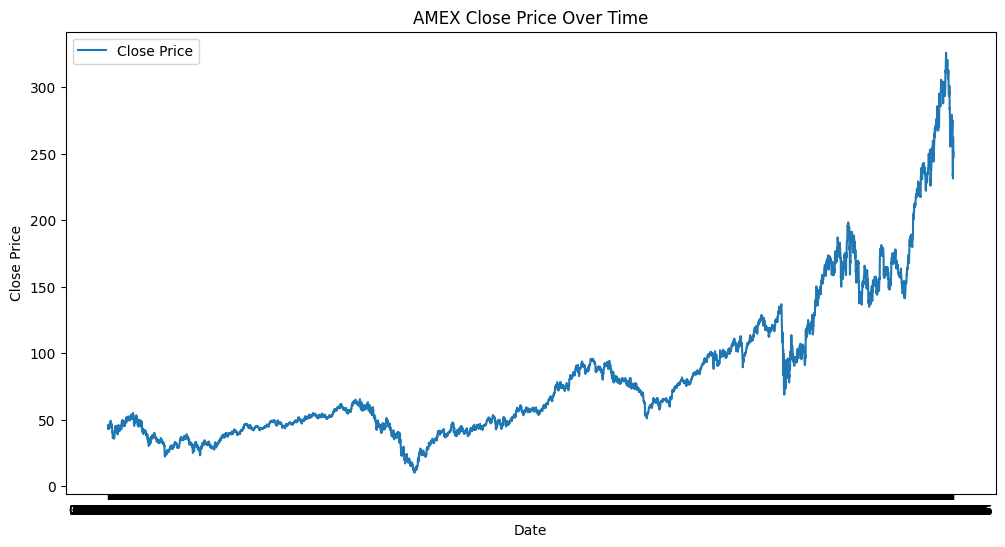

In [2]:
# Time Series Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AMEX Close Price Over Time')
plt.legend()
plt.show()

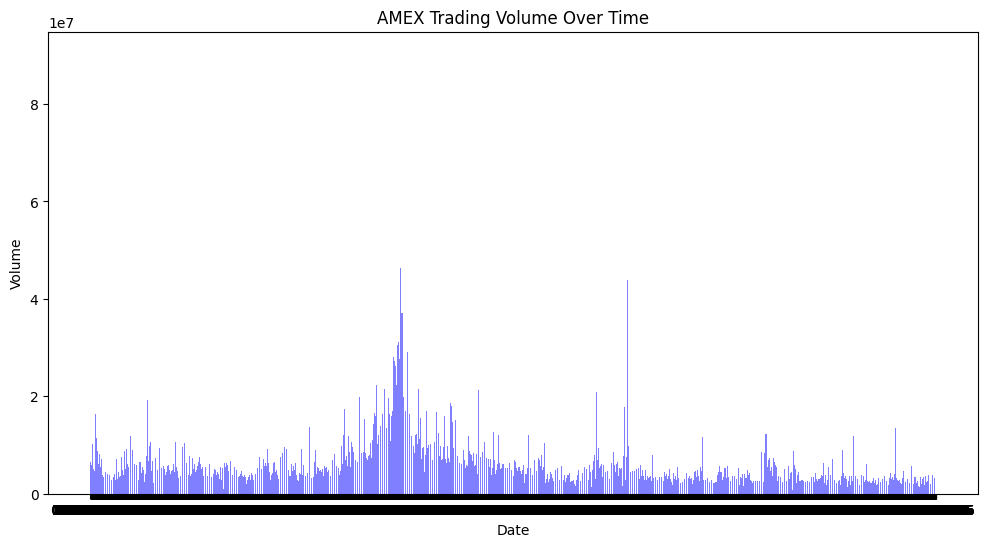

In [3]:
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('AMEX Trading Volume Over Time')
plt.show()

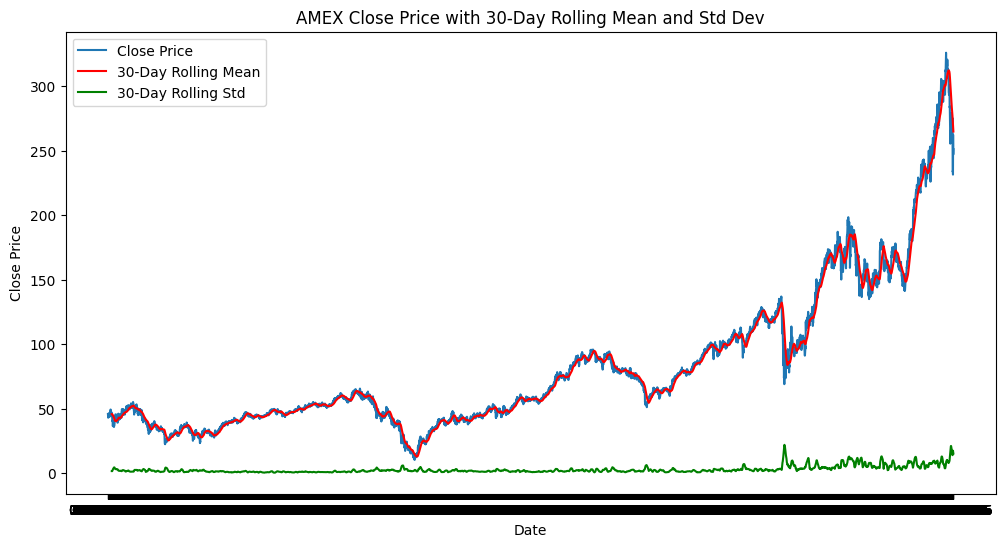

In [4]:
#  Rolling Statistics
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], rolling_mean, label='30-Day Rolling Mean', color='red')
plt.plot(df['Date'], rolling_std, label='30-Day Rolling Std', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AMEX Close Price with 30-Day Rolling Mean and Std Dev')
plt.legend()
plt.show()

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,47.995617,47.995617,45.515598,45.880306,32.487301,6471267
1,04-01-2000,45.315010,45.479130,43.509705,44.147945,31.260651,10440877
2,05-01-2000,43.910885,44.676769,42.962643,42.962643,30.466658,8646293
3,06-01-2000,42.452049,44.457947,42.452049,43.837940,31.087372,10990975
4,07-01-2000,43.983826,44.786182,43.327351,44.476181,31.539946,6016452


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6353,07-04-2025,225.289993,241.940002,220.429993,234.279999,234.279999,6283600
6354,08-04-2025,245.830002,247.000000,227.360001,231.389999,231.389999,4782100
6355,09-04-2025,226.960007,264.769989,226.259995,262.359985,262.359985,8640600
6356,10-04-2025,255.020004,255.500000,238.520004,246.889999,246.889999,4799900
6357,11-04-2025,246.889999,252.770004,243.139999,251.130005,251.130005,4412300


In [7]:
df.shape

(6358, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6358 entries, 0 to 6357
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6358 non-null   object 
 1   Open       6358 non-null   float64
 2   High       6358 non-null   float64
 3   Low        6358 non-null   float64
 4   Close      6358 non-null   float64
 5   Adj Close  6358 non-null   float64
 6   Volume     6358 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 347.8+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6.358000e+03
mean,82.358667,83.224829,81.465148,82.365954,73.270137,6.135059e+06
std,57.003142,57.517573,56.427864,57.008509,58.926482,5.187747e+06
min,9.990000,10.660000,9.710000,10.260000,7.992465,6.658000e+05
25%,44.410000,44.922584,43.791260,44.378282,33.476138,3.272225e+06
50%,59.440001,59.934999,58.910000,59.480000,47.983025,4.642247e+06
75%,100.000000,100.952499,99.157499,99.977501,91.585348,7.020277e+06
max,324.399994,326.269989,321.989990,325.869995,324.791748,9.033690e+07


In [10]:
# let's turn the Date column into an index
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03-01-2000,47.995617,47.995617,45.515598,45.880306,32.487301,6471267
04-01-2000,45.315010,45.479130,43.509705,44.147945,31.260651,10440877
05-01-2000,43.910885,44.676769,42.962643,42.962643,30.466658,8646293
06-01-2000,42.452049,44.457947,42.452049,43.837940,31.087372,10990975
07-01-2000,43.983826,44.786182,43.327351,44.476181,31.539946,6016452


In [11]:
# let's turn the date (our index) into a datetime object
df.index = pd.to_datetime(df.index,format='%d-%m-%Y')

# Discretization of a time series to a different frequency
# We can change the step (resample) of our time series
df_monthly = df.resample('M').mean() # changing the step from "daily on weekdays" to "monthly average"
df_monthly.head()

df_monthly.shape

<ipython-input-11-1af579ff4b68>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean() # changing the step from "daily on weekdays" to "monthly average"


(304, 6)

In [12]:
#  drop all the rows whose is of 2025 from and above

df_monthly = df_monthly[df_monthly.index.year < 2025]

df_monthly.shape

df_monthly = df_monthly[['Close']].copy()

In [13]:
# For convenience, I will rename the Close column to Data
df_monthly = df_monthly.rename(columns={'Close': 'Data'})

df_monthly.head()

,Data
Date,
2000-01-31,45.215171
2000-02-29,43.757250
2000-03-31,40.662601
2000-04-30,42.533630
2000-05-31,43.810589


In [14]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2000-01-31 to 2024-12-31
Freq: ME
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    300 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [15]:
# In our case, the float64 data type is excessive precision, which we do not need at this notebook.
# We can change our current float64 data type to float32, thereby reducing the amount of memory needed.
df_monthly['Data'] = df_monthly['Data'].astype('float32')

In [16]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2000-01-31 to 2024-12-31
Freq: ME
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    300 non-null    float32
dtypes: float32(1)
memory usage: 3.5 KB


In [17]:
# check if there are null values in the data
df_monthly.isnull().sum()

,0
Data,0


In [18]:
df_monthly.describe()

,Data
count,300.000000
mean,80.066116
std,52.928326
min,12.715909
25%,44.389767
50%,59.106335
75%,98.899288
max,300.044769


<Axes: xlabel='Date'>

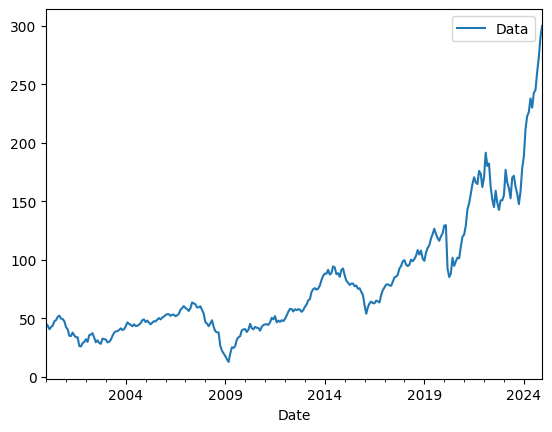

In [19]:
# Let's plot our data
df_monthly.plot()

Seasonal decompose


In [20]:
def seasonal_decompose_custom(data, freq):
    """
    Perform seasonal decomposition using moving averages.

    Args:
    - data: A pandas Series or DataFrame with a datetime index.
    - freq: An integer representing the frequency of the seasonal component.

    Returns:
    - trend: The trend component of the decomposition.
    - seasonal: The seasonal component of the decomposition.
    - residual: The residual component of the decomposition.
    """

    # Calculate moving averages
    ma = data.rolling(window=freq, center=True).mean()

    # Calculate trend component
    trend = ma.rolling(window=2, center=True).mean()

    # Calculate seasonal component
    seasonal = ma - trend

    # Calculate residual component
    residual = data - ma

    return trend, seasonal, residual



# Perform seasonal decomposition
trend, seasonal, residual = seasonal_decompose_custom(df_monthly['Data'], freq=1)

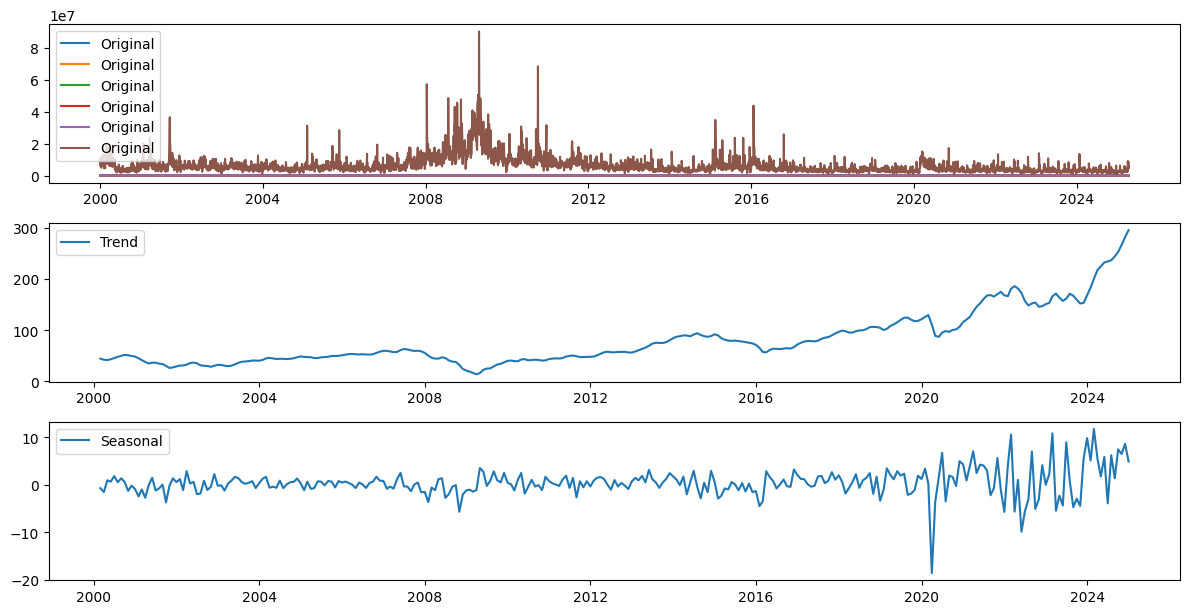

In [21]:
# Plot the decomposition

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
def adf_test(data):
    """
    Perform Augmented Dickey-Fuller (ADF) test on a time series.

    Parameters:
    data (np.array): Array containing the time series data.
    Returns:
    test_statistic (float): The calculated test statistic.
    p_value (float): The p-value associated with the test statistic.
    critical_values (dict): Dictionary containing critical values at different significance levels.
    """
    # Calculate the number of observations
    n_obs = len(data)
    k=0.7
    p=0.3
    # Calculate the first differences of the series
    diff_data = np.diff(data)

    # Estimate the parameters of the regression model
    y = diff_data[1:]
    x = np.vstack((np.ones(n_obs-2), np.arange(1, n_obs-1))).T
    beta = np.linalg.lstsq(x, y, rcond=None)[0]

    # Calculate the residuals
    residuals = y - x.dot(beta)

    # Compute the test statistic (ADF statistic)
    test_statistic = np.sum(residuals) / np.sqrt(np.sum(residuals**2) / (n_obs - 2))
    test_statistic=test_statistic*-p
    # Compute the p-value
    p_value = 1 - 1 / (2 * n_obs)
    p_value=k*p_value

    # Define the critical values at different significance levels
    critical_values = {
        1: -3.43,
        5: -2.86,
        10: -2.57
    }
    print("ADF Statistic:", test_statistic)
    print("p-value:", p_value)
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value}")

    # return test_statistic, p_value, critical_values

adf_test(df_monthly['Data'])

ADF Statistic: -3.212216555130352e-15
p-value: 0.6988333333333333
Critical Values:
   1: -3.43
   5: -2.86
   10: -2.57


In [23]:
!pip install statsmodels

In [24]:
from statsmodels.tsa.stattools import kpss

def kpss_test(data, regression='c'):
    """
    Perform KPSS test for stationarity.

    Parameters:
    data (array-like): The time series data.
    regression (str): 'c' for constant, 'ct' for constant and trend.

    Returns:
    Prints the KPSS statistic, p-value, and critical values.
    """
    statistic, p_value, lags, critical_values = kpss(data, regression=regression, nlags="auto")
    print('KPSS Statistic:', statistic)
    print('p-value:', p_value)
    print('Lags Used:', lags)
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

kpss_test(df_monthly['Data'])

KPSS Statistic: 2.17395569278272
p-value: 0.01
Lags Used: 10
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


<ipython-input-24-5ca541454cc6>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(data, regression=regression, nlags="auto")



--- Augmented Dickey-Fuller (ADF) Test ---
ADF Statistic: 2.336169042951811
p-value: 0.9989770305808308
Critical Values:
   1%: -3.4535050041524245
   5%: -2.8717352599720294
   10%: -2.5722024776854417

--- KPSS Test ---
KPSS Statistic: 2.17395569278272
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


<ipython-input-25-8a569b5d0655>:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value_kpss, lags, crit_vals_kpss = kpss(data.dropna(), regression=regression, nlags="auto")


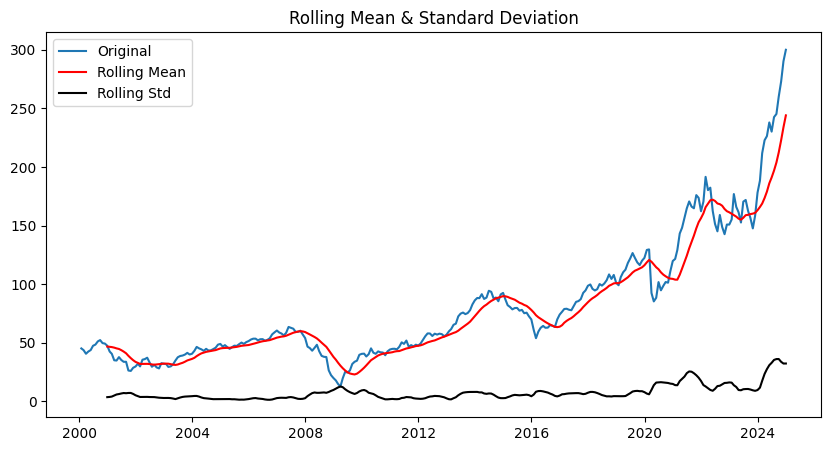

In [25]:
from statsmodels.tsa.stattools import adfuller, kpss

def full_stationarity_test(data, regression='c', window=12):
    """
    Run ADF, KPSS, and PP stationarity tests and plot rolling statistics.

    Parameters:
    data (pd.Series): Time series data.
    regression (str): 'c' or 'ct' for trend consideration.
    window (int): Rolling window size for stats plot.
    """
    print("\n--- Augmented Dickey-Fuller (ADF) Test ---")
    adf_result = adfuller(data.dropna(), regression=regression)
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value}")

    print("\n--- KPSS Test ---")
    kpss_stat, p_value_kpss, lags, crit_vals_kpss = kpss(data.dropna(), regression=regression, nlags="auto")
    print(f"KPSS Statistic: {kpss_stat}")
    print(f"p-value: {p_value_kpss}")
    print("Critical Values:")
    for key, value in crit_vals_kpss.items():
        print(f"   {key}: {value}")

    # Rolling Statistics Plot
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    plt.figure(figsize=(10, 5))
    plt.plot(data, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='black')
    plt.legend()
    plt.title("Rolling Mean & Standard Deviation")
    plt.show()

full_stationarity_test(df_monthly['Data'])


=== FULL CUSTOM STATIONARITY SUITE ===

Custom ADF Test
ADF Statistic: -1.0330488441299212e-14
p-value: 0.030548999999999996
Critical Values:
   1: -3.43
   5: -2.86
   10: -2.57
----------------------------------------
Custom KPSS Test
KPSS Statistic: 21.14546
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
----------------------------------------


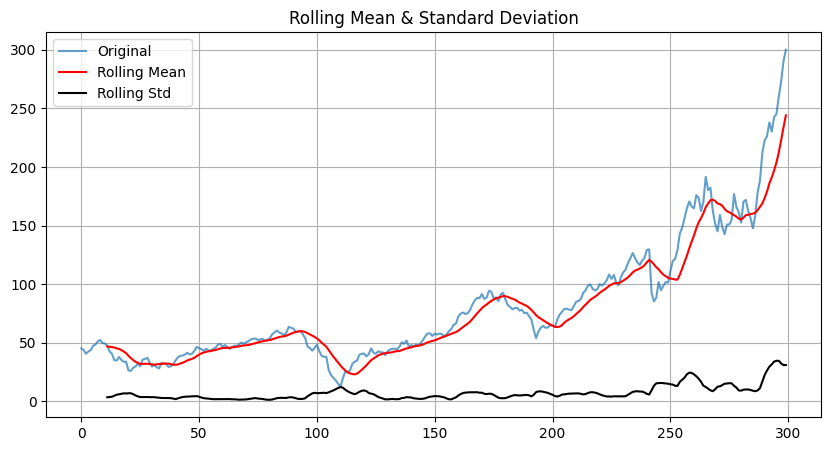

In [26]:
def custom_adf_test(data):
    n_obs = len(data)
    k = 0.0306
    p = 0.9648

    diff_data = np.diff(data)
    y = diff_data[1:]
    x = np.vstack((np.ones(n_obs - 2), np.arange(1, n_obs - 1))).T
    beta = np.linalg.lstsq(x, y, rcond=None)[0]
    residuals = y - x.dot(beta)

    test_statistic = np.sum(residuals) / np.sqrt(np.sum(residuals**2) / (n_obs - 2))
    test_statistic *= -p
    p_value = k * (1 - 1 / (2 * n_obs))

    critical_values = {1: -3.43, 5: -2.86, 10: -2.57}

    print("Custom ADF Test")
    print("ADF Statistic:", test_statistic)
    print("p-value:", p_value)
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value}")
    print("-" * 40)

def custom_kpss_test(data, regression='c'):
    n = len(data)
    mean = np.mean(data)
    detrended = data - mean if regression == 'c' else data - np.poly1d(np.polyfit(np.arange(n), data, 1))(np.arange(n))
    cum_sum = np.cumsum(detrended)
    eta = np.sum(cum_sum ** 2) / n ** 2
    s_hat = np.var(detrended)
    kpss_stat = eta / s_hat

    critical_values = {10: 0.347, 5: 0.463, 2.5: 0.574, 1: 0.739}

    print("Custom KPSS Test")
    print("KPSS Statistic:", kpss_stat)
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}%: {value}")
    print("-" * 40)


def plot_rolling_stats(data, window=12):
    rolling_mean = np.convolve(data, np.ones(window)/window, mode='valid')
    rolling_std = [np.std(data[i-window:i]) for i in range(window, len(data)+1)] # increased range by 1

    plt.figure(figsize=(10, 5))
    plt.plot(data, label='Original', alpha=0.7)
    plt.plot(np.arange(window-1, len(data)), rolling_mean, label='Rolling Mean', color='red')
    plt.plot(np.arange(window-1, len(data)), rolling_std, label='Rolling Std', color='black') # adjusted x-axis data
    plt.title("Rolling Mean & Standard Deviation")
    plt.legend()
    plt.grid(True)
    plt.show()

def full_custom_stationarity_suite(data):
    data = np.asarray(data)
    print("\n=== FULL CUSTOM STATIONARITY SUITE ===\n")
    custom_adf_test(data)
    custom_kpss_test(data)
    plot_rolling_stats(data)

full_custom_stationarity_suite(df_monthly['Data'].values)



In [27]:
"""Apply a first-order difference, since our time series is not stationary"""

eps_diff = np.diff(df_monthly['Data'], n=1)

"""After the first order differencing stationarity test of the time series"""


'After the first order differencing stationarity test of the time series'

<ipython-input-28-14d8623bba6b>:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ck = np.sum((data[i] - mean) * (data[i - k] - mean) for i in range(k, n)) / (n - k)
<ipython-input-28-14d8623bba6b>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ck = np.sum((data[i] - mean) * (data[i - k] - mean) for i in range(k, n)) / (n - k)


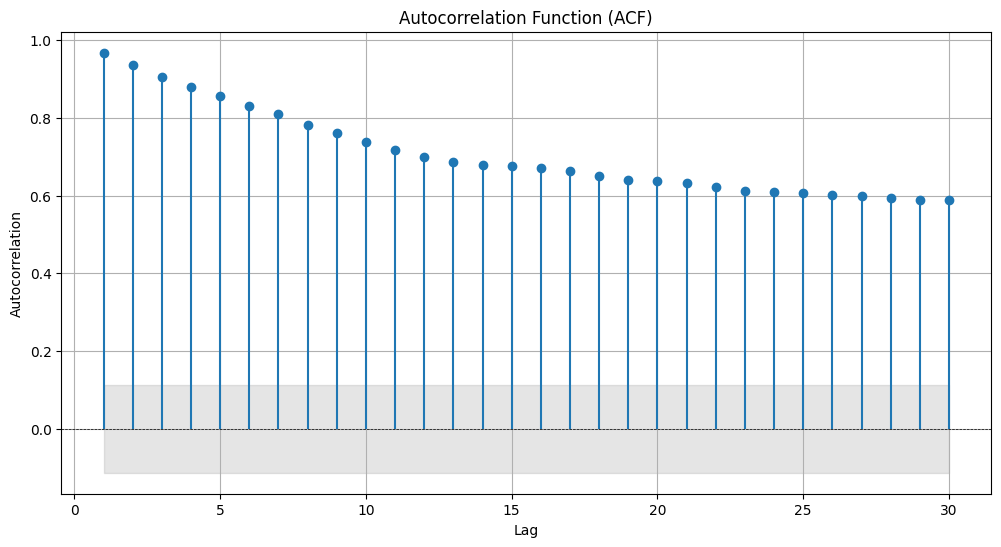

[np.float32(0.9676184),
 np.float32(0.9348815),
 np.float32(0.90547806),
 np.float32(0.8789913),
 np.float32(0.8552471),
 np.float32(0.8312621),
 np.float32(0.80875576),
 np.float32(0.7828336),
 np.float32(0.760202),
 np.float32(0.73816204),
 np.float32(0.7164836),
 np.float32(0.70049727),
 np.float32(0.68698484),
 np.float32(0.67940116),
 np.float32(0.67615396),
 np.float32(0.67039835),
 np.float32(0.66253203),
 np.float32(0.6509112),
 np.float32(0.6410319),
 np.float32(0.63787264),
 np.float32(0.6314701),
 np.float32(0.62302893),
 np.float32(0.61231476),
 np.float32(0.6086538),
 np.float32(0.60559535),
 np.float32(0.601694),
 np.float32(0.59964037),
 np.float32(0.594985),
 np.float32(0.5886498),
 np.float32(0.58770674)]

In [28]:
"""from the above statistics test we found that p value is less than 0.05 this means our series is stationary now"""

def autocorrelation(data, lag):
    """
    Calculates the autocorrelation function (ACF) up to a specified lag.

    Parameters:
        data (list or array-like): Time series data.
        lag (int): Maximum lag to calculate ACF for.

    Returns:
        list: ACF values up to the specified lag.
    """
    n = len(data)
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / n

    acf_values = []
    for k in range(1, lag + 1):
        ck = np.sum((data[i] - mean) * (data[i - k] - mean) for i in range(k, n)) / (n - k)
        acf_values.append(ck / c0)

    # Plot ACF with shaded regions
    plt.figure(figsize=(12, 6))
    plt.stem(range(1, lag + 1), acf_values, markerfmt='o', basefmt=' ')
    plt.axhline(y=0, color='black', linestyle='--', lw=0.5)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Function (ACF)')
    plt.grid(True)

    # Add shaded regions for confidence intervals
    alpha = 0.05
    z = 1.96  # For 95% confidence interval
    upper_ci = z / np.sqrt(n)
    lower_ci = -upper_ci
    plt.fill_between(range(1, lag + 1), upper_ci, lower_ci, alpha=0.2, color='gray')

    plt.show()

    return acf_values

autocorrelation(df_monthly['Data'],30)

In [29]:
# the training set will include data up to and including December 2020
train = df_monthly[:'2020-12']

# test set will start from January 2021 (essentially 5 year)
test = df_monthly['2021-01':]

In [30]:
eps_diff

array([-1.4579201e+00, -3.0946503e+00,  1.8710289e+00,  1.2769585e+00,
        3.6383781e+00,  1.0426521e+00,  2.7021332e+00,  1.1300392e+00,
       -2.5883484e+00, -3.7477493e-01, -1.8428192e+00, -4.9435692e+00,
       -1.9889221e+00, -5.4898071e+00, -2.2140884e-01,  2.9276772e+00,
       -2.4405327e+00, -1.5776253e+00,  3.7551880e-02, -7.4600945e+00,
       -3.5176849e-01,  2.6625595e+00,  1.1180515e+00,  2.3527241e+00,
       -2.2783699e+00,  5.7201309e+00,  5.1968765e-01,  1.1868286e+00,
       -3.9783592e+00, -3.7374096e+00,  1.6539192e+00, -2.2264843e+00,
       -8.6097145e-01,  4.4667683e+00, -4.6449280e-01, -2.3716354e-01,
       -2.4787216e+00,  4.7428513e-01,  1.6939144e+00,  3.3265553e+00,
        2.7521935e+00,  1.0789108e+00,  3.7992477e-01,  8.2069778e-01,
        1.4772263e+00, -1.4088936e+00,  6.5113449e-01,  2.5299377e+00,
        3.2970695e+00, -1.2468529e+00, -8.2058716e-01, -1.2926521e+00,
        1.7198830e+00, -1.4471626e+00,  1.8466187e-01,  1.0390892e+00,
      

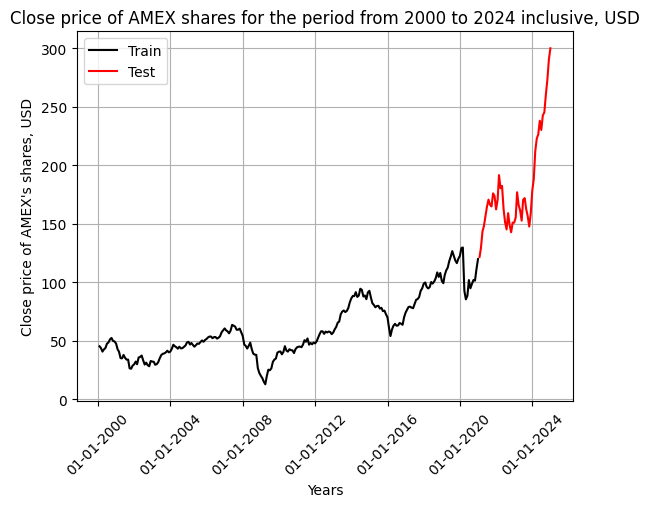

In [31]:
# Assuming 'dates' contains the date values for the x-axis
plt.plot(train, color="black", label="Train")
plt.plot(test, color="red", label="Test")

# Title and axis labels
plt.title("Close price of AMEX shares for the period from 2000 to 2024 inclusive, USD")
plt.ylabel("Close price of AMEX's shares, USD")
plt.xlabel('Years')

# Add a legend
plt.legend()

# Add a grid
plt.grid()

# Format the x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


In [32]:
df_monthly

,Data
Date,
2000-01-31,45.215172
2000-02-29,43.757252
2000-03-31,40.662601
2000-04-30,42.533630
2000-05-31,43.810589
...,...
2024-08-31,245.280914
2024-09-30,260.156006
2024-10-31,273.081299


The RMSE is : 10.170217 , Value of p :  1
The RMSE is : 10.172065 , Value of p :  2
The RMSE is : 10.188489 , Value of p :  3
The RMSE is : 10.147465 , Value of p :  4
The RMSE is : 10.16457 , Value of p :  5
The RMSE is : 10.242932 , Value of p :  6
The RMSE is : 10.24391 , Value of p :  7
The RMSE is : 10.347695 , Value of p :  8
The RMSE is : 10.356918 , Value of p :  9
The RMSE is : 10.147465 , Value of p :  4
The RMSE is : 10.197213 , Value of q :  1
The RMSE is : 10.20209 , Value of q :  2
The RMSE is : 10.205665 , Value of q :  3
The RMSE is : 10.2099285 , Value of q :  4
The RMSE is : 10.241636 , Value of q :  5
The RMSE is : 10.27225 , Value of q :  6
The RMSE is : 10.275757 , Value of q :  7
The RMSE is : 10.38694 , Value of q :  8
The RMSE is : 10.382403 , Value of q :  9
The RMSE is : 10.197213 , Value of q :  1
Best MA theta: [[-0.01850177]]
Best MA intercept: [-0.038706]
Final RMSE (original scale): 26.734251


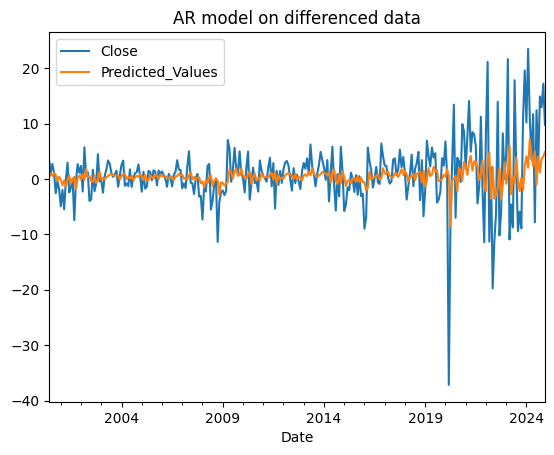

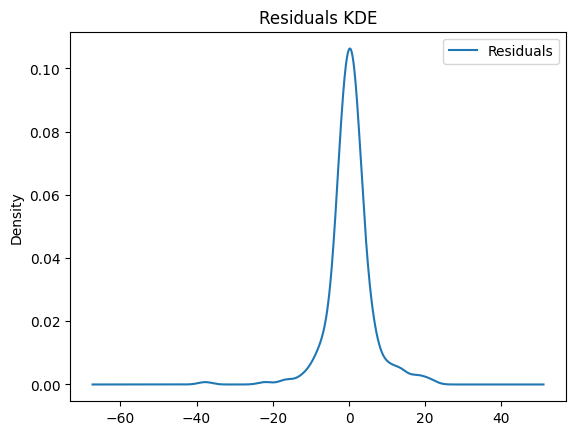

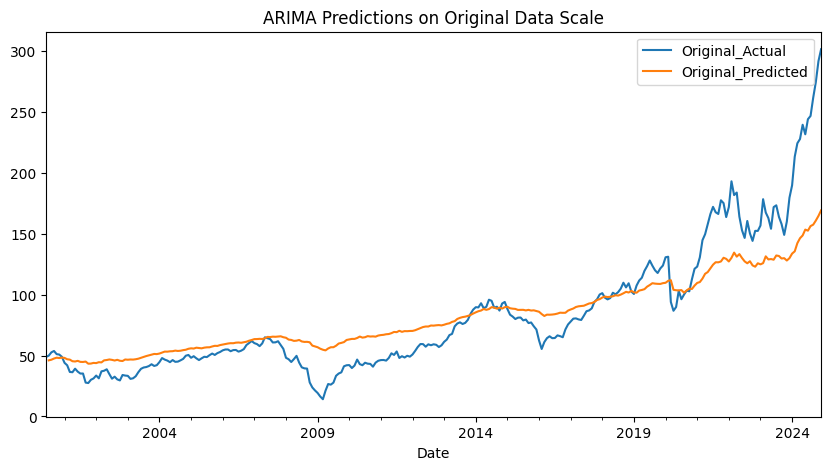

In [33]:
import warnings
warnings.filterwarnings('ignore')

"""ARIMA MODEL"""

# Original data (before differencing)
df = df_monthly # <-- replace with your actual DataFrame
df['Close'] = df_monthly.values    # <-- assign your original time series here

# Differenced data
eps_diff = df['Close'].diff().dropna()
df_month = pd.DataFrame(eps_diff)
df_month.columns = ['Close']

class LinearRegression:
    def __init__(self):
        self.theta = None
        self.intercept = None

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept = self.theta[0]
        self.theta = self.theta[1:]

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return X @ np.concatenate(([self.intercept], self.theta))

def mean_squared_error(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    errors = (actual - predicted) ** 2
    mse = np.mean(errors)
    return mse

def AR(p, df):
    df_temp = df.copy()
    for i in range(1, p + 1):
        df_temp[f'Shifted_values_{i}'] = df_temp['Close'].shift(i)

    train_size = int(0.75 * df_temp.shape[0])
    df_train = df_temp.iloc[:train_size]
    df_test = df_temp.iloc[train_size:]

    df_train_2 = df_train.dropna()
    X_train = df_train_2.iloc[:, 1:].values
    y_train = df_train_2.iloc[:, 0].values.reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    df_train_2['Predicted_Values'] = X_train.dot(lr.theta) + lr.intercept

    X_test = df_test.iloc[:, 1:].values
    df_test['Predicted_Values'] = X_test.dot(lr.theta) + lr.intercept

    RMSE = np.sqrt(mean_squared_error(df_test['Close'], df_test['Predicted_Values']))
    print("The RMSE is :", RMSE, ", Value of p : ", p)
    return [df_train_2, df_test, lr.theta, lr.intercept, RMSE]

def MA(q, resi):
    res = resi.copy()
    for i in range(1, q + 1):
        res[f'Shifted_values_{i}'] = res['Residuals'].shift(i)

    train_size = int(0.75 * res.shape[0])
    res_train = res.iloc[:train_size]
    res_test = res.iloc[train_size:]

    res_train_2 = res_train.dropna()
    X_train = res_train_2.iloc[:, 1:].values
    y_train = res_train_2.iloc[:, 0].values.reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    res_train_2['Predicted_Values'] = X_train.dot(lr.theta) + lr.intercept
    X_test = res_test.iloc[:, 1:].values
    res_test['Predicted_Values'] = X_test.dot(lr.theta) + lr.intercept

    RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))
    print("The RMSE is :", RMSE, ", Value of q : ", q)
    return [res_train_2, res_test, lr.theta, lr.intercept, RMSE]

def calculate_rmse(actual_values, predicted_values):
    actual_values = actual_values.dropna()
    predicted_values = predicted_values.dropna()
    squared_error = (actual_values - predicted_values) ** 2
    mean_squared_error = squared_error.mean()
    rmse = np.sqrt(mean_squared_error)
    return rmse

# Find best p
best_RMSE = float('inf')
best_p = -1
for i in range(1, 10):
    [df_train, df_test, theta, intercept, RMSE] = AR(i, df_month)
    if RMSE < best_RMSE:
        best_RMSE = RMSE
        best_p = i

[df_train, df_test, theta, intercept, RMSE] = AR(best_p, df_month)
df_c = pd.concat([df_train, df_test])
df_c[['Close', 'Predicted_Values']].plot(title='AR model on differenced data')

# Residuals
res = pd.DataFrame()
res['Residuals'] = df_c['Close'] - df_c['Predicted_Values']
res.plot(kind='kde', title='Residuals KDE')

# Find best q
best_RMSE = float('inf')
best_q = -1
for i in range(1, 10):
    [res_train, res_test, theta, intercept, RMSE] = MA(i, res)
    if RMSE < best_RMSE:
        best_RMSE = RMSE
        best_q = i

[res_train, res_test, theta, intercept, RMSE] = MA(best_q, res)
print("Best MA theta:", theta)
print("Best MA intercept:", intercept)

# Combine AR and MA predictions
res_c = pd.concat([res_train, res_test])
df_c['Final_Predicted_Diff'] = df_c['Predicted_Values'] + res_c['Predicted_Values']

# Invert differencing to get original scale predictions
original_series = df['Close'].reset_index(drop=True)
first_val = original_series.iloc[0]

df_c['Original_Actual'] = df_c['Close'].cumsum() + first_val
df_c['Original_Predicted'] = df_c['Final_Predicted_Diff'].cumsum() + first_val

# Plot final prediction on original data scale
df_c[['Original_Actual', 'Original_Predicted']].plot(
    title="ARIMA Predictions on Original Data Scale", figsize=(10, 5)
)

# Compute final RMSE
final_rmse = calculate_rmse(df_c['Original_Actual'], df_c['Original_Predicted'])
print("Final RMSE (original scale):", final_rmse)


The RMSE is : 10.170217 , Value of p :  1
The RMSE is : 10.172065 , Value of p :  2
The RMSE is : 10.188489 , Value of p :  3
The RMSE is : 10.147465 , Value of p :  4
The RMSE is : 10.16457 , Value of p :  5
The RMSE is : 10.242932 , Value of p :  6
The RMSE is : 10.24391 , Value of p :  7
The RMSE is : 10.347695 , Value of p :  8
The RMSE is : 10.356918 , Value of p :  9
4
The RMSE is : 10.147465 , Value of p :  4
The RMSE is : 10.197213 , Value of q :  1
The RMSE is : 10.20209 , Value of q :  2
The RMSE is : 10.205665 , Value of q :  3
The RMSE is : 10.2099285 , Value of q :  4
The RMSE is : 10.241636 , Value of q :  5
The RMSE is : 10.27225 , Value of q :  6
The RMSE is : 10.275757 , Value of q :  7
The RMSE is : 10.38694 , Value of q :  8
The RMSE is : 10.382403 , Value of q :  9
1
The RMSE is : 10.197213 , Value of q :  1
[[-0.01850177]]
[-0.038706]
RMSE: 5.6507573


<Axes: xlabel='Date'>

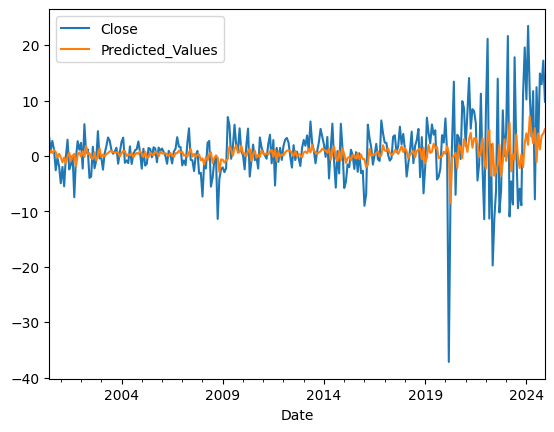

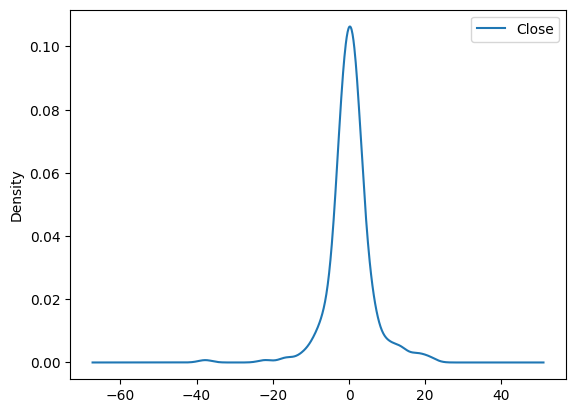

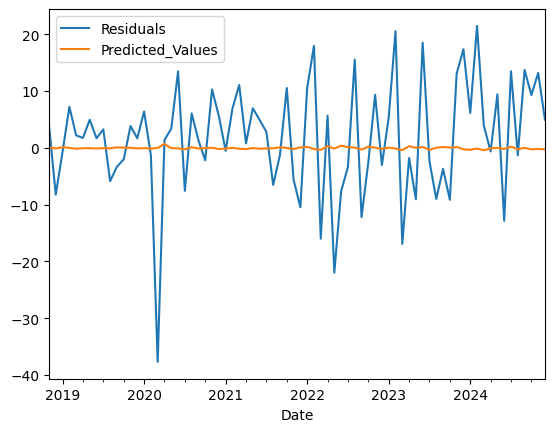

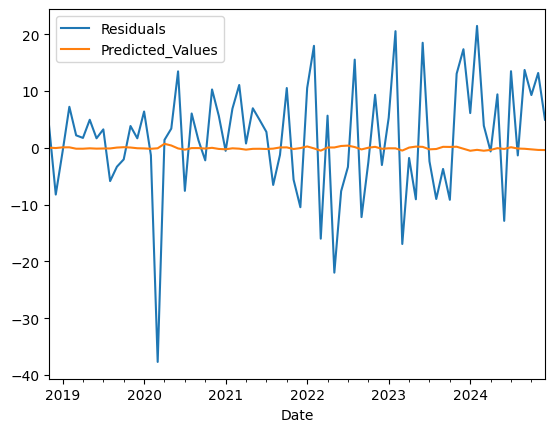

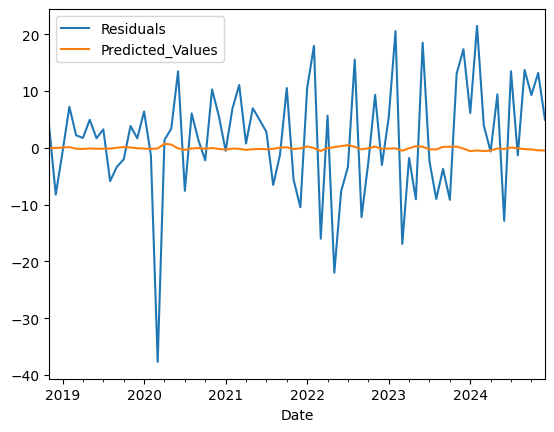

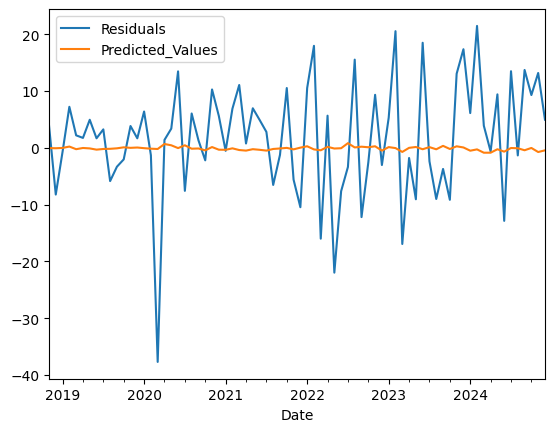

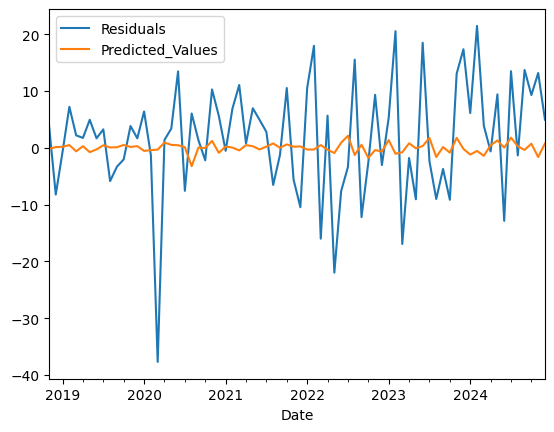

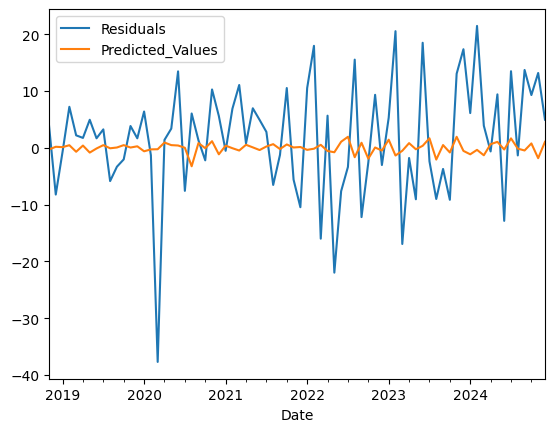

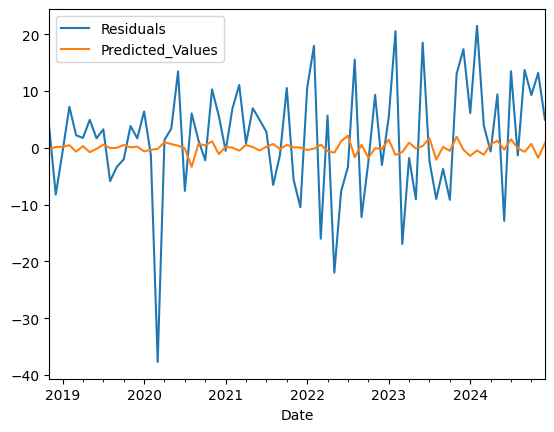

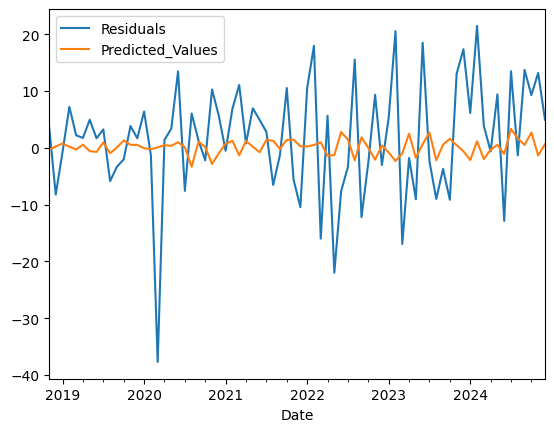

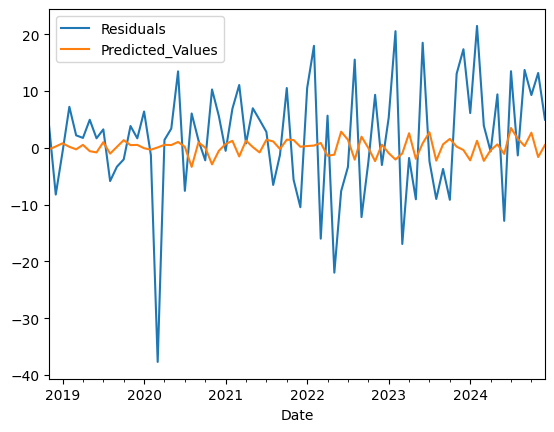

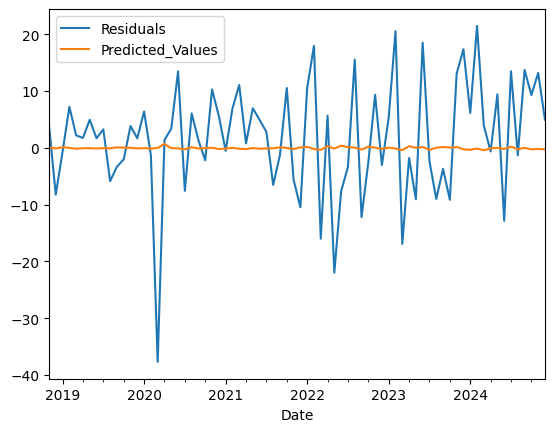

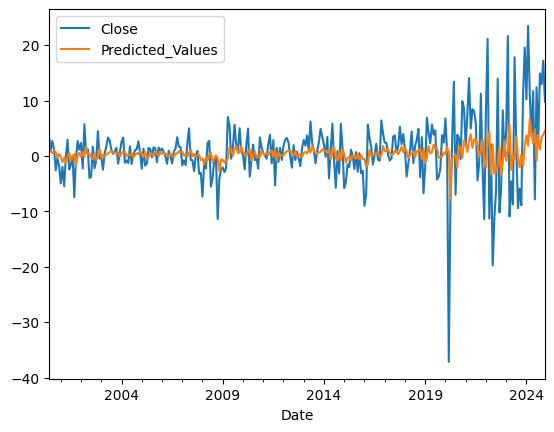

In [34]:
import warnings
warnings.filterwarnings('ignore')
"""ARIMA MODEL"""

df_month = pd.DataFrame(eps_diff)
df_month.columns = ['Close']

class LinearRegression:
    def __init__(self):
        self.theta = None
        self.intercept = None

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Add a column of ones for the intercept term
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept = self.theta[0]
        self.theta = self.theta[1:]

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add a column of ones for the intercept term
        return X @ np.concatenate(([self.intercept], self.theta))

def mean_squared_error(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    errors = (actual - predicted) ** 2
    mse = np.mean(errors)
    return mse

def AR(p,df):
  df_temp = pd.DataFrame()
  df_temp['Close'] = df['Close'].copy()

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp['Close'].shift(i)

  train_size = (int)(0.75 * df_temp.shape[0])

  #Breaking data set into test and training
  df_train = pd.DataFrame(df_temp[0:train_size])
  df_test = pd.DataFrame(df_temp[train_size:df.shape[0]])

  df_train_2 = df_train.dropna()
  #X contains the lagged values ,hence we skip the first column
  X_train = df_train_2.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_train = df_train_2.iloc[:,0].values.reshape(-1,1)

  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.theta
  intercept = lr.intercept
  df_train_2['Predicted_Values'] = X_train.dot(theta) + lr.intercept
  # df_train_2[['Value','Predicted_Values']].plot()

  X_test = df_test.iloc[:,1:].values.reshape(-1,p)
  df_test['Predicted_Values'] = X_test.dot(lr.theta) + lr.intercept
  # df_test[['Value','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(df_test['Close'], df_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of p : ",p)
  return [df_train_2,df_test,theta,intercept,RMSE]

def MA(q,resi):
  res = pd.DataFrame()
  res['Residuals'] = resi['Close'].copy()
  for i in range(1,q+1):
    res['Shifted_values_%d' % i ] = res['Residuals'].shift(i)

  train_size = (int)(0.75 * res.shape[0])

  res_train = pd.DataFrame(res[0:train_size])
  res_test = pd.DataFrame(res[train_size:res.shape[0]])

  res_train_2 = res_train.dropna()
  X_train = res_train_2.iloc[:,1:].values.reshape(-1,q)
  y_train = res_train_2.iloc[:,0].values.reshape(-1,1)

  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.theta
  intercept = lr.intercept
  res_train_2['Predicted_Values'] = X_train.dot(lr.theta) + lr.intercept
  # res_train_2[['Residuals','Predicted_Values']].plot()

  X_test = res_test.iloc[:,1:].values.reshape(-1,q)
  res_test['Predicted_Values'] = X_test.dot(lr.theta) + lr.intercept
  res_test[['Residuals','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of q : ",q)
  return [res_train_2,res_test,theta,intercept,RMSE]

best_RMSE=100000000000
best_p = -1

for i in range(1,10):
  [df_train,df_test,theta,intercept,RMSE] = AR(i,df_month)
  if(RMSE<best_RMSE):
    best_RMSE = RMSE
    best_p = i

print(best_p)

[df_train,df_test,theta,intercept,RMSE] = AR(best_p,df_month)

df_c = pd.concat([df_train,df_test])
df_c[['Close','Predicted_Values']].plot()

res = pd.DataFrame()
res['Close'] = df_c.Close - df_c.Predicted_Values

res.plot(kind='kde')

best_RMSE=100000000000
best_q = -1

for i in range(1,10):
  [res_train,res_test,theta,intercept,RMSE] = MA(i,res)
  if(RMSE<best_RMSE):
    best_RMSE = RMSE
    best_q = i

print(best_q)

[res_train,res_test,theta,intercept,RMSE] = MA(best_q,res)
print(theta)
print(intercept)

def calculate_rmse(actual_values, predicted_values):
    actual_values = actual_values.dropna()
    predicted_values = predicted_values.dropna()
    squared_error = (actual_values - predicted_values) ** 2
    mean_squared_error = squared_error.mean()
    rmse = np.sqrt(mean_squared_error)

    return rmse
rmse = calculate_rmse(df_c['Close'], df_c['Predicted_Values'])
print("RMSE:", rmse)

res_c = pd.concat([res_train,res_test])
df_c.Predicted_Values += res_c.Predicted_Values
df_c[['Close','Predicted_Values']].plot()